In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random as python_random

import math

# 1.Предобработка данных

In [2]:
#Считаем все набранные временные ряды переходных процессов
csv_names = os.listdir(".")
csv_names.remove('.ipynb_checkpoints')
csv_names.remove('dataset_making.py')
csv_names.remove('data_proc_before_kz.ipynb')
csv_names.remove('data_proc_after_kz.ipynb')
csv_names.remove('new_res')
csv_names.remove('test_osib1')
csv_names.remove('Данные для тестовой схемы')
csv_names.remove('predict.png')

csv_names = csv_names
#print(csv_names)

In [3]:
print(csv_names)

['000000.csv', '000001.csv', '000002.csv', '000003.csv', '000004.csv', '000005.csv', '000006.csv', '000007.csv', '000008.csv', '000009.csv', '000010.csv', '000011.csv', '000012.csv', '000013.csv', '000014.csv', '000015.csv', '000016.csv', '000017.csv', '000018.csv', '000019.csv', '000020.csv', '000021.csv', '000022.csv', '000023.csv', '000024.csv', '000025.csv', '000026.csv', '000027.csv', '000028.csv', '000029.csv', '000030.csv', '000031.csv', '000032.csv', '000033.csv', '000034.csv', '000035.csv', '000036.csv', '000037.csv', '000038.csv', '000039.csv', '000040.csv', '000041.csv', '000042.csv', '000043.csv', '000044.csv', '000045.csv', '000046.csv', '000047.csv', '000048.csv', '000049.csv', '000050.csv', '000051.csv', '000052.csv', '000053.csv', '000054.csv', '000055.csv', '000056.csv', '000057.csv', '000058.csv', '000059.csv', '000060.csv', '000061.csv', '000062.csv', '000063.csv', '000064.csv', '000065.csv', '000066.csv', '000067.csv', '000068.csv', '000069.csv', '000070.csv', '0000

In [236]:
def pre_processing_apv_data(csv_name, i):
    result = pd.DataFrame()
    w = 0
    delta_1 = 0
    time_1 = 0
    transient = pd.DataFrame()
    time_2 = 0
    transient_56 = pd.DataFrame()

    # Считаем необходимые данные
    transient = pd.read_csv(csv_name[i], delimiter=";",
                                decimal=",", index_col=False)[71 -1 :93 + 6 :]
    transient_56 = pd.read_csv(csv_name[i], delimiter=";",
                                   decimal=",", index_col=False)[68 - 1:93 + 6:]

 

        # Выполним расчеты относительно березовской грэс
    transient['delta'] = transient['delta_horon']   #- transient['delta_beraza']
    
       # Избавляемся от выбросов по углу (еще не точно)
    if (transient['delta'] > 450).any():
        return result
    
    transient_56['delta'] = transient_56['delta_horon']  #- transient_56['delta_beraza']

        # Переводим данные в в формат numpy
    delta_1 = transient_56["delta"].to_numpy()
    time_1 = transient_56["t"].to_numpy()

        # Избавляемся от плюс минус нуля
    transient = transient.drop(index=[82])

        # Теперь удалим точки появляющиеся при расчете ПП плюс минус ноль
    time_2 = np.delete(time_1, 13 + 1)
    delta = np.delete(delta_1, 13 + 1)

        # Считаем производную
    w = np.diff(delta) / (np.diff(time_2) * 1000)

        # Удаляем первую строчку, для соблюденяи размерности
    w_1 = np.delete(w, 0)
    w_1 = np.delete(w_1, 0)
    transient["w"] = w_1
    result = pd.concat([result, transient], ignore_index=True)
    i += 4
    return result


In [237]:
def pre_processing_apv250_data(csv_name, i):
    result = pd.DataFrame()
    w = 0
    delta_1 = 0
    time_1 = 0
    transient = pd.DataFrame()
    time_2 = 0
    transient_56 = pd.DataFrame()

    # Считаем необходимые данные
    transient = pd.read_csv(csv_name[i], delimiter=";",
                                decimal=",", index_col=False)[66 - 1:88 + 6:]
    transient_56 = pd.read_csv(csv_name[i], delimiter=";",
                                   decimal=",", index_col=False)[63 - 1:88 + 6:]


        # Выполним расчеты относительно березовской грэс
    transient['delta'] = transient['delta_horon']   #- transient['delta_beraza']
    
        # Избавляемся от выбросов по углу (еще не точно)
    if (transient['delta'] > 450).any():
            return result
    
    transient_56['delta'] = transient_56['delta_horon']  #- transient_56['delta_beraza']

        # Переводим данные в в формат numpy
    delta_1 = transient_56["delta"].to_numpy()
    time_1 = transient_56["t"].to_numpy()

        # Избавляемся от плюс минус нуля
    transient = transient.drop(index=[77])
        # Теперь удалим точки появляющиеся при расчете ПП плюс минус ноль
    time_2 = np.delete(time_1, 13 + 1)
    delta = np.delete(delta_1, 13 + 1)

        # Считаем производную
    w = np.diff(delta) / (np.diff(time_2) * 1000)

        # Удаляем первую строчку, для соблюденяи размерности
    w_1 = np.delete(w, 0)
    w_1 = np.delete(w_1, 0)
    transient["w"] = w_1
    result = pd.concat([result, transient], ignore_index=True)
    i += 4
    return result

In [238]:
def pre_processing_kz250_data(csv_name, i):
        result = pd.DataFrame()
        w = 0
        delta_1 = 0
        time_1 = 0
        transient = pd.DataFrame()
        time_2 = 0
        transient_56 = pd.DataFrame()

        # Считаем необходимые данные
        transient = pd.read_csv(csv_name[i], delimiter=";",
                                decimal=",", index_col=False)[29 - 1:51 + 6:]
        transient_56 = pd.read_csv(csv_name[i], delimiter=";",
                                   decimal=",", index_col=False)[26 - 1:51 + 6:]

        # Выполним расчеты относительно березовской грэс
        transient['delta'] = transient['delta_horon']  #- transient['delta_beraza']
        
                # Избавляемся от выбросов по углу (еще не точно)
        if (transient['delta'] > 450).any():
            return result

        transient_56['delta'] = transient_56['delta_horon']  #- transient_56['delta_beraza']

        # Переводим данные в в формат numpy
        delta_1 = transient_56["delta"].to_numpy()
        time_1 = transient_56["t"].to_numpy()

        # Избавляемся от плюс минус нуля
        transient = transient.drop(index=[40])

        # Теперь удалим точки появляющиеся при расчете ПП плюс минус ноль
        time_2 = np.delete(time_1, 13 + 1)
        delta = np.delete(delta_1, 13 + 1)

        # Считаем производную
        w = np.diff(delta) / (np.diff(time_2) * 1000)

        # Удаляем первую строчку, для соблюденяи размерности
        w_1 = np.delete(w, 0)
        w_1 = np.delete(w_1, 0)
        transient["w"] = w_1
        result = pd.concat([result, transient], ignore_index=True)
        i += 4
        return result

In [239]:
def pre_processing_kz300_data(csv_name, i):
        result = pd.DataFrame()
        w = 0
        delta_1 = 0
        time_1 = 0
        transient = pd.DataFrame()
        time_2 = 0
        transient_56 = pd.DataFrame()
        
        #Считаем необходимые данные
        transient = pd.read_csv(csv_name[i], delimiter=";",
                                decimal=",", index_col=False)[31 - 1:53 + 6:]
        transient_56 = pd.read_csv(csv_name[i], delimiter=";",
                                   decimal=",", index_col=False)[28 - 1:53 + 6:]
        

        
        #Выполним расчеты относительно березовской грэс
        transient['delta'] = transient['delta_horon'] #- transient['delta_beraza']
        
                #Избавляемся от выбросов по углу (еще не точно)
        if (transient['delta'] > 450).any():
            return result
        
        transient_56['delta'] = transient_56['delta_horon'] #- transient_56['delta_beraza']
        
        #Переводим данные в в формат numpy
        delta_1 = transient_56["delta"].to_numpy()
        time_1 = transient_56["t"].to_numpy()

        #Избавляемся от плюс минус нуля
        transient = transient.drop(index=[42])
        #Теперь удалим точки появляющиеся при расчете ПП плюс минус ноль
        time_2 = np.delete(time_1, 14 + 1)
        delta = np.delete(delta_1, 14 + 1)

        #Считаем производную
        w = np.diff(delta) / (np.diff(time_2) * 1000)

        #Удаляем первую строчку, для соблюденяи размерности
        w_1 = np.delete(w, 0)
        w_1 = np.delete(w_1, 0)
        transient["w"] = w_1
        result = pd.concat([result, transient], ignore_index=True)
        return result

In [240]:
#Обработка и равномерное распределение возмущений 
def get_df_tran(csv_names):
    it = 0
    result = pd.DataFrame()
    while it <= 135:
        if it in range(0,len(csv_names),4):
            result = pd.concat([result, pre_processing_apv_data(csv_name=csv_names,i=it)], ignore_index=True)
        elif it in range(1,len(csv_names),4):
            result = pd.concat([result, pre_processing_apv250_data(csv_name=csv_names,i=it)], ignore_index=True)
        elif it in range(2, len(csv_names), 4):
            result = pd.concat([result, pre_processing_kz250_data(csv_name=csv_names,i=it)], ignore_index=True)
        elif it in range(3, len(csv_names), 4):
            result = pd.concat([result, pre_processing_kz300_data(csv_name=csv_names,i=it)], ignore_index=True)
        it += 1
    return result

# 2. Обучение модели

In [241]:
#Зададим начальные условия для генератора случайных чисел
np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [242]:
#Считаем наш временной ряд
csv_path = "I:\dev\python64\python_course\python3.9\working_model\test_trans_w_1"
#df = pd.read_csv(csv_path, delimiter=';')[26::]
#df = pd.read_csv('test_trans_w_1.csv', delimiter = ";",  decimal=".")
df = get_df_tran(csv_names)
df = df[['t','delta','w']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       3080 non-null   float64
 1   delta   3080 non-null   float64
 2   w       3080 non-null   float64
dtypes: float64(3)
memory usage: 72.3 KB


<AxesSubplot:>

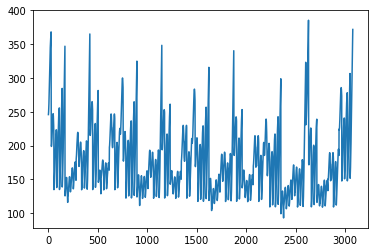

In [243]:
df['delta'].plot()


## Извлекаем необходимые данные

In [244]:
#Извлечем метку времени и удалим из начального дата фрейма
date_time = pd.to_datetime(df.pop('t'), unit='ms')
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [245]:
#Разобьем полученный временной ряд на 3 выборки, тренировочную,
#валидационную, тестовую 
n = len(df)
column_indices = {name: i for i, name in enumerate(df.columns)}

train_df = df[0 : 80 * 28]
val_df = df[80 * 28: 94 * 28]
test_df = df[94 * 28:]

# Нормализация данных

Нормализация данных. Перед обучением нейронной сети важно масштабировать функции. Нормализация - это распространенный способ масштабирования: вычесть среднее значение и разделить на стандартное отклонение каждой функции.
Среднее и стандартное отклонение следует вычислять только с использованием обучающих данных, чтобы модели не имели доступа к значениям в наборах для проверки и тестирования.

Также можно утверждать, что модель не должна иметь доступа к будущим значениям в обучающем наборе во время обучения, и что эта нормализация должна выполняться с использованием скользящих средних.
Это не является целью данного руководства, и наборы для проверки и тестирования гарантируют, что вы получите (в некоторой степени) честные показатели. Итак, в интересах простоты в этом руководстве используется простое среднее.

<AxesSubplot:>

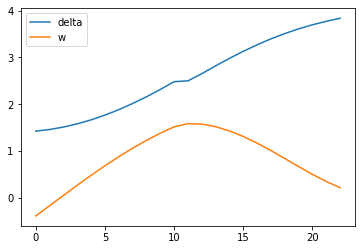

In [246]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_df[0:23:].plot()

### Data windowing

Модели в этом руководстве сделают набор прогнозов на основе окна последовательных выборок данных.

Основные особенности окон ввода:

- Ширина (количество временных шагов) окон ввода и меток.
- Временной сдвиг между ними.
- Какие функции используются в качестве входных данных, меток или и того, и другого.

В этом руководстве строятся различные модели (включая линейные модели, модели DNN, CNN и RNN), которые используются для обеих:
- Прогнозы с одним и несколькими выходами.
- Прогнозы с одним и несколькими шагами по времени.


В этом разделе основное внимание уделяется реализации окна данных, чтобы его можно было повторно использовать для всех этих моделей.


В зависимости от задачи и типа модели вам может потребоваться сгенерировать различные окна данных. Вот некоторые примеры:
- Прогнозы с одним и несколькими выходами.
- Прогнозы с одним и несколькими временными шагами.
В этом разделе основное внимание уделяется реализации окна данных, чтобы его можно было повторно использовать для всех этих моделей.



Остальная часть этого раздела определяет класс WindowGenerator. Этот класс может:

- Обрабатывайте индексы и смещения, как показано на схемах выше.
- Разделите окна объектов на пары (объекты, метки).
- Постройте содержимое полученных окон.
- Эффективно генерируйте пакеты этих окон из данных обучения, оценки и тестирования, используя tf.data.

1. Indexes and offsets
Start by creating the WindowGenerator class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later

In [247]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

# 2. Split

Учитывая список последовательных входов, метод split_window преобразует их в окно входов и окно меток.

Пример w2, который вы определили ранее, будет разделен следующим образом:

In [248]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [249]:
def plot(self, model=None, plot_col = 'delta', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    ##if n == 0:
    ##    plot_col = 'u10_x'
    ##if n == 1:
    ##    plot_col = 'u10_y'
    ##if n == 2:
    ##    plot_col = 'i'
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time step')

WindowGenerator.plot = plot

# 4. Create tf.data.Datasets

Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset

In [250]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [251]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# Shift
The shift argument determines the number of input elements to shift between the start of each window. If windows and elements are both numbered starting at 0, the first element in window k will be element k * shift of the input dataset. In particular, the first element of the first window will always be the first element of the input dataset.

In [252]:
MAX_EPOCHS = 1000
num_features = 2
OUT_STEPS = 10 + 4
multi_train_performance = {}
multi_val_performance = {}
multi_performance = {}

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Total window size: 28
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Label column name(s): None

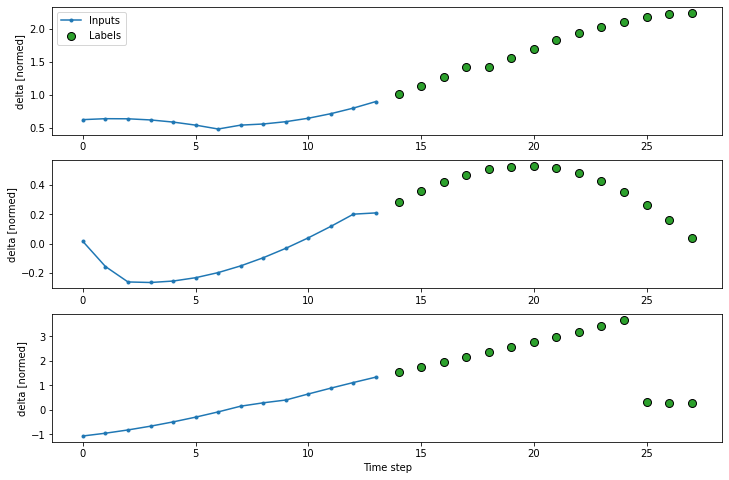

In [253]:
multi_window = WindowGenerator(input_width=11 + 3,
                               label_width=OUT_STEPS,
                               shift=10 + 4
                            )

multi_window.plot()
multi_window

#### RNN
A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 24 hours, before making a single prediction for the next 24 hours.

In this single-shot format, the LSTM only needs to produce an output at the last time step, so set `return_sequences=False` in `tf.keras.layers.LSTM`.

12/12 [==============================] - 0s 997us/step - loss: 0.2294 - mean_absolute_error: 0.2840


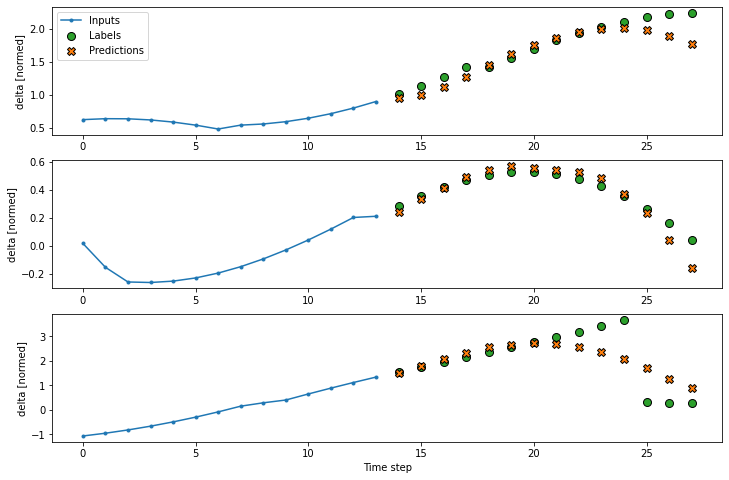

In [254]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(30, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_train_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train)
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then, each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic <a href="https://arxiv.org/abs/1308.0850" class="external">Generating Sequences With Recurrent Neural Networks</a>.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

#### RNN

This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single time step.

The model will have the same basic form as the single-step LSTM models from earlier: a `tf.keras.layers.LSTM` layer followed by a `tf.keras.layers.Dense` layer that converts the `LSTM` layer's outputs to model predictions.

A `tf.keras.layers.LSTM` is a `tf.keras.layers.LSTMCell` wrapped in the higher level `tf.keras.layers.RNN` that manages the state and sequence results for you (Check out the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide for details).

In this case, the model has to manually manage the inputs for each step, so it uses `tf.keras.layers.LSTMCell` directly for the lower level, single time step interface.

In [255]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [256]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

The first method this model needs is a `warmup` method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step `LSTM` model from earlier:

In [257]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction and the internal state of the `LSTM`:

In [258]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 2])

With the `RNN`'s state, and an initial prediction you can now continue iterating the model feeding the predictions at each step back as the input.

The simplest approach for collecting the output predictions is to use a Python list and a `tf.stack` after the loop.

Note: Stacking a Python list like this only works with eager-execution, using `Model.compile(..., run_eagerly=True)` for training, or with a fixed length output. For a dynamic output length, you would need to use a `tf.TensorArray` instead of a Python list, and `tf.range` instead of the Python `range`.

In [259]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

Test run this model on the example inputs:

In [260]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 14, 2)


Now, train the model:

12/12 [==============================] - 0s 1ms/step - loss: 0.2132 - mean_absolute_error: 0.2550


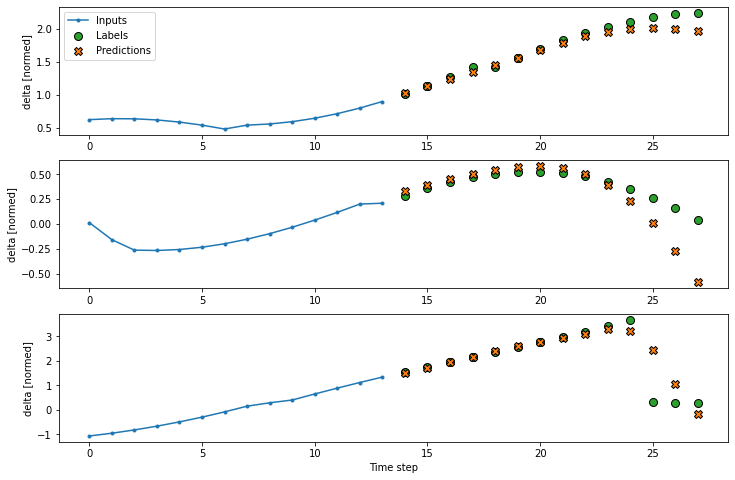

In [271]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_train_performance['AR LSTM'] = feedback_model.evaluate(multi_window.train)
multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

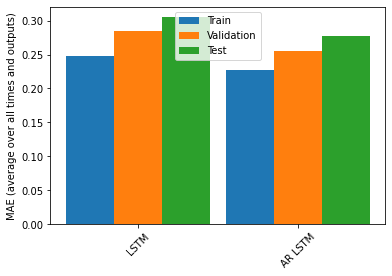

In [272]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
train_mae = [v[metric_index] for v in multi_train_performance.values()]
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x-0.3, train_mae, width, label='Train')
plt.bar(x, val_mae, width, label='Validation')
plt.bar(x+0.3, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [273]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

LSTM    : 0.3053
AR LSTM : 0.2774


In [274]:
for name, value in multi_val_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

LSTM    : 0.2840
AR LSTM : 0.2550


In [275]:
for name, value in multi_train_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

LSTM    : 0.2477
AR LSTM : 0.2272


# Прогноз данных с использованием обученных моделей

## Подготовка тестового датасета

In [140]:
n = 9
t = 24
input_t = 12
start_conting = 92
#Для примера считаем данные из тестовой выборки, т.е. эти данные не используются при обучении 
#test_csv = pd.read_csv('test_trans_w_1.csv', delimiter = ";",  decimal=".")[2750:]
#test_csv.columns = ['t','vras','modI','delta','w']

test_csv = df[start_conting * t + t * n : start_conting * t + t * (n + 1)]
#Приведем данные к такому же формату, что и данные, которые использовались при обучении

#delta = test_csv["delta"].to_numpy()
#delta_1 = np.where( delta < 360, delta, delta - 360)

#извелекаем угол ротора
#test_csv["delta"] = delta_1

#формируем слайс из первых 500 мс переходного процесса 
test_csv_pred = df[start_conting * t + t * n: (start_conting * t + t * n )+ input_t  ]


#Извлечем метку времени и удалим из начального дата фрейма
#date_time = pd.to_datetime(test_csv_pred.pop('t'), unit='ms')
#timestamp_s = date_time.map(pd.Timestamp.timestamp)


#Производим нормализацию
test_df_1 = (test_csv_pred - train_mean) / train_std

#Проверяем что получилось
test_df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 2424 to 2435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delta   12 non-null     float64
 1   w       12 non-null     float64
dtypes: float64(2)
memory usage: 324.0 bytes


In [141]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 2424 to 2447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delta   24 non-null     float64
 1   w       24 non-null     float64
dtypes: float64(2)
memory usage: 516.0 bytes


In [142]:
#Приводим тестовый датасет к виду, который используется для пронозирования. Добавляем одну ось
test_df_ten = test_df_1.to_numpy()
test_df_ten = np.expand_dims(test_df_ten, axis=0)


## AR LSTM

In [143]:
#Выполняем прогноз с исользованием нашей обученной нейронной сети
predictions_feedback = feedback_model.predict(test_df_ten)
#Данные прогноза преобразуем в формату, для дальнейшего создания датафрейма
predictions = predictions_feedback.reshape(t - input_t ,2)
predictions

#Создаем датафрейм с предсказанными данными
predictions_DF_ar = pd.DataFrame(data=predictions, columns = ['delta', 'w'])
#Произведем денормализацию
predictions_DF_ar = (predictions_DF_ar * train_std) + train_mean
#display(predictions_DF)

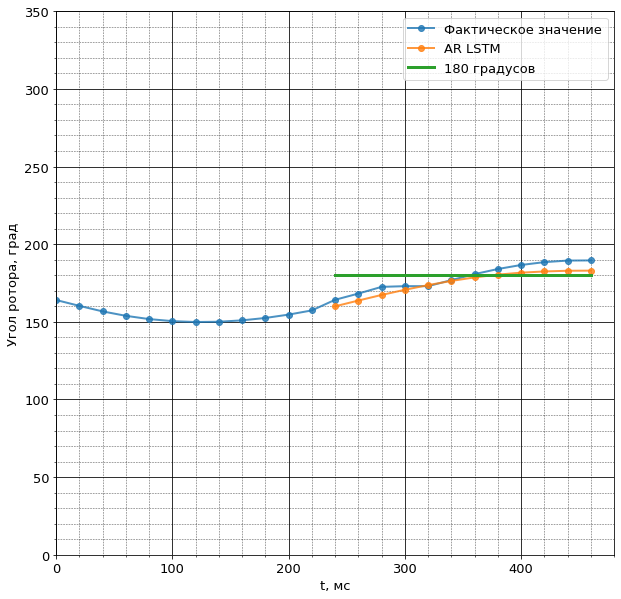

In [144]:
#predictions_DF['delta'].plot()
time_input = np.array(range(0, t * 20 ,20))
time_input_pred = np.array(range(input_t * 20 , t * 20, 20))
limit = np.full((t - input_t ), 180)

fig, axes = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

axes.plot(time_input, test_csv['delta'], 'o-', label = 'Фактическое значение', linewidth = 2, alpha=0.8)
axes.plot(time_input_pred, predictions_DF_ar['delta'], 'o-',label = 'AR LSTM', linewidth = 2, alpha=0.8)
#plt.plot(time_input_pred, predictions_DF_lstm['delta'], 'o-',label = 'LSTM', linewidth = 2, alpha=0.8)
#plt.plot(time_input_pred, predictions_DF_conv['delta'], 'o-',label = 'Conv', linewidth = 2, alpha=0.8)
#plt.plot(time_input_pred, predictions_DF_dense['delta'], 'o-',label = 'Dense', linewidth = 2, alpha=0.8)
#plt.plot(time_input_pred, predictions_DF_lin['delta'], 'o-',label = 'Linear', linewidth = 2, alpha=0.8)
axes.plot(time_input_pred, limit, linewidth = 3, label = '180 градусов')

plt.ylim(0,350)
plt.xlim(0,t * 20)

#Добавим оси
plt.xlabel('t, мс',fontsize=13)
plt.ylabel('Угол ротора, град',fontsize=13)

#Добавим решетку 
axes.grid(which='major',
        color = 'k', 
        linewidth = 0.8)

axes.grid(which='minor', 
        color = 'k', 
        linestyle = ':',
         linewidth = 0.6)

axes.minorticks_on()


axes.legend(fontsize=13)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

fig.savefig('predict.png', dpi=300, facecolor='white')

# Сохраним все обученные модели

In [1111]:
#feedback_model.save('ar_lstm')

In [51]:
#multi_conv_model.save('multi_conv_model_1')

In [52]:
#multi_dense_model.save('multi_dense_model_1')

In [53]:
#multi_linear_model.save('multi_linear_model_1')

In [54]:
#multi_lstm_model.save('multi_lstm_model_1')

In [55]:
#avg_error = abs(test_csv['delta'][25:50].reset_index(drop=True) -  predictions_DF_ar['delta']) / test_csv['delta'][25:50].reset_index(drop=True)

In [56]:
#predictions_DF_ar['delta'].plot()
#plt.show()
#test_csv['delta'][25:50].reset_index(drop=True).plot()
#plt.show()

In [57]:
#display(avg_error)

In [58]:
#avg_error.mean() * 100

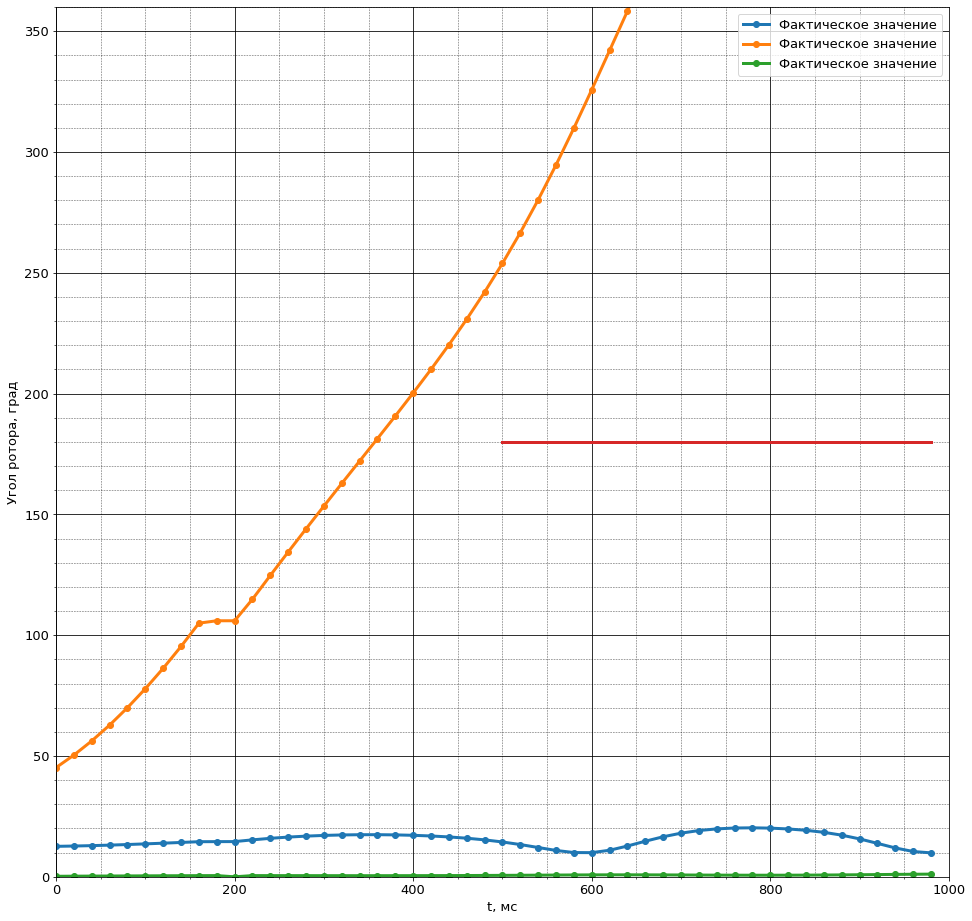

In [59]:
###predictions_DF['delta'].plot()

time_input = np.array(range(0,1000,20))
time_input_pred = np.array(range(500,1000,20))
limit = np.full((25), 180)

fig, axes = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(16)

axes.plot(time_input, test_csv[:50], 'o-', label = 'Фактическое значение', linewidth = 3)

axes.plot(time_input_pred, limit, linewidth = 3)

plt.ylim(0,360)
plt.xlim(0,1000)

#Добавим оси
plt.xlabel('t, мс',fontsize=13)
plt.ylabel('Угол ротора, град',fontsize=13)

#Добавим решетку 
axes.grid(which='major',
        color = 'k', 
        linewidth = 0.8)

axes.grid(which='minor', 
        color = 'k', 
        linestyle = ':',
         linewidth = 0.6)

axes.minorticks_on()


axes.legend(fontsize=13)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

fig.savefig('predict.png', dpi=300, facecolor='white')